#### 1.	 (5 points) A meteorologist is interested in comparing the amount of snowfall during a two-day winter blizzard that hit both Illinois and New York. In particular, this scientist is interested in determining if the variability in the snowfall in these two states differs. To assess this, the scientist collected data from 90 communities in each of these two states. These data are provided in the file labeled “HW6_Problem_1.txt”. The unit of measurement is in inches.

#### a.	(2 points) Construct a 95% two-sided confidence intervals for the variance and standard deviation of snowfall in both Illinois and New York (i.e., four CIs will be constructed). Please show all of your work, but please feel free to compare your results with R or SAS.

In [24]:
hw6_pr_1_data <- read.table("HW6_Problem_1.txt", sep='', header=TRUE)

### General confidence interval for the population variance 

$$
\frac{(n-1)S^2}{\chi^2_{df=n-1, 1-\alpha/2}} < \sigma^2 < \frac{(n-1)S^2}{\chi^2_{df=n-1, \alpha/2}}  
$$

In [25]:
confint_var <- function(x,alpha){
    n <- length(x)
    s2 <- var(x)
    chis <- qchisq(p = c(1-alpha/2, alpha/2),df = n-1)
    
    ci <- (n-1)*s2/(chis)
    return(ci)
}


confint <- rbind(sqrt(confint_var(hw6_pr_1_data$Illinois, alpha=0.05)),
                 sqrt(confint_var(hw6_pr_1_data$New_York, alpha=0.05)))

colnames(confint) <- c("Lower Bound $\\sqrt{\\frac{(n-1)S^2}{\\chi^2_{df=n-1, 1-\\alpha/2}}}$", 
                       "Upper Bound $\\sqrt{\\frac{(n-1)S^2}{\\chi^2_{df=n-1, \\alpha/2}}}$")

confint

"Lower Bound $\sqrt{\frac{(n-1)S^2}{\chi^2_{df=n-1, 1-\alpha/2}}}$","Upper Bound $\sqrt{\frac{(n-1)S^2}{\chi^2_{df=n-1, \alpha/2}}}$"
2.764968,3.715331
2.853227,3.833926


#### b.(1 point) Assume that the meteorologist wants to determine if the population standard deviation of snowfall among the 90 communities in Illinois is less than two inches. Conduct the appropriate hypothesis test at α = 0.05.

In [26]:
n <- length(hw6_pr_1_data$Illinois)
s <- sd(hw6_pr_1_data$Illinois)
sigma_0 <-2
ts <- (n-1)*s^2/sigma_0^2
chi_crit <- qchisq(0.05, df=n-1)

res <- matrix(c(ts, chi_crit), ncol=2, nrow=1, byrow=TRUE)

colnames(res) <- c('$\\chi^2$ statistic', 'critical value $\\chi_{\\alpha}$')

res


$\chi^2$ statistic,critical value $\chi_{\alpha}$
223.59672,68.24928


As the chi-squared statistic is larger than the critical value, we reject the hypothesis the variance is smaller than $4$ and likewise reject the hypothesis test that the standard deviation is smaller than 2. 

#### c.	(1 point) Is there enough evidence to conclude that the variance in snowfall differs in Illinois and New York? Test at α = 0.05.

In [27]:
confint_var_ratio <- function(var1, var2, alpha){
    if(var(var1)>var(var2)){
        ratio <- var(var1)/var(var2)
        F_l <- qf(alpha/2, df1=length(var1)-1, df2=length(var2)-1)
        F_u <- qf(1-alpha/2,df1=length(var1)-1, df2=length(var2)-1)
    }else{
        ratio <- var(var2)/var(var1)
        F_l <- qf(alpha/2, df1=length(var2)-1, df2=length(var1)-1)
        F_u <- qf(1-alpha/2,df1=length(var2)-1, df2=length(var1)-1)
       
    }
    
    confint <- matrix(c(ratio*F_l ,  ratio*F_u), ncol=2, nrow=1, byrow=T)
    colnames(confint) <- c("lower $F_l\\times \\frac{s^2_1}{s^2_2}$", "upper $F_U\\times\\frac{s^2_1}{s^2_2}$")   

    return(confint)
}


confint_var_ratio(hw6_pr_1_data$Illinois, hw6_pr_1_data$New_York, alpha=0.05)

lower $F_l\times \frac{s^2_1}{s^2_2}$,upper $F_U\times\frac{s^2_1}{s^2_2}$
0.7009341,1.6177371


As the $.95$ confidence interval for the ratio between the variances of Illinois and New York snowfall does include 1, we fail to reject the null hypothesis $H_0: \frac{\sigma^2_{IL}}{\sigma^2_{NY}} = 1$ and conclude that we have insufficient evidence to support the assertion that the variance in Snowfall differs in New York and Illinois

d.	(1 point) Make box plots and histograms to visually assess the normality of the distribution of snowfall in Illinois and New York. Conduct the Shapiro-Wilk test at α = 0.05 to determine if it is safe to assume that the distribution of snowfall is normal in each state. As part of this, state the null and alternative hypotheses for the Shapiro-Wilk test. Do the necessary conditions for conducting the inference in the previous questions appear to be satisfied? Why do the data need to be normally distributed for these tests to be appropriate?


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


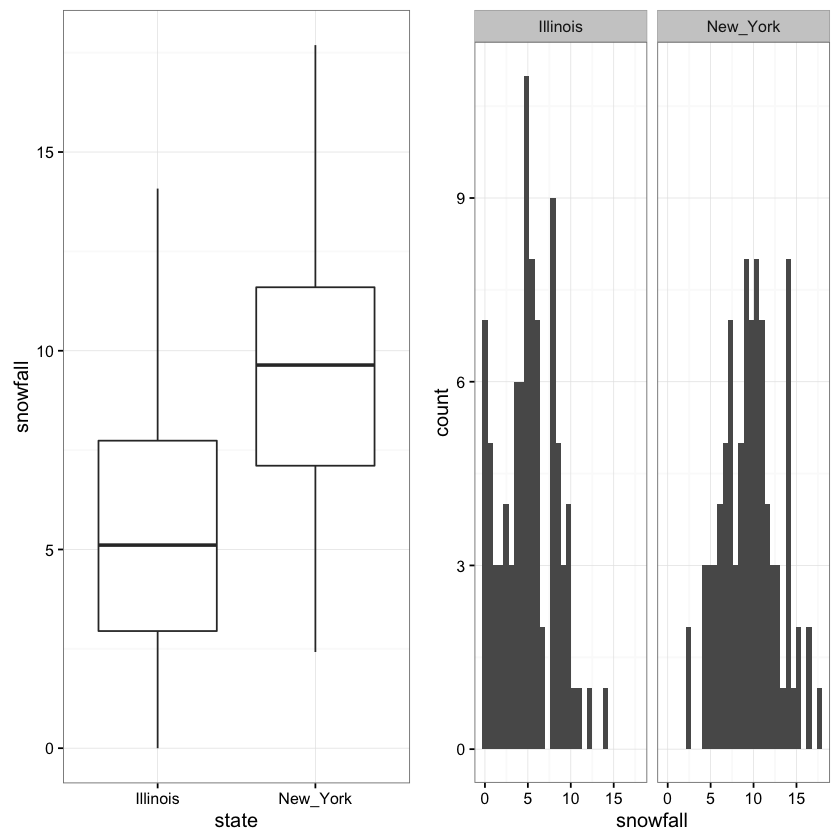

In [28]:
## you can ignore the following 
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}



library(reshape2)
library(ggplot2)
hw6_pr_1_data_m <- melt(hw6_pr_1_data, measure.vars = c("Illinois","New_York"))
colnames(hw6_pr_1_data_m)<-c("state", "snowfall")
p1 <- ggplot(hw6_pr_1_data_m, aes(x=state, y=snowfall)) + geom_boxplot() + theme_bw()
p2 <- ggplot(hw6_pr_1_data_m, aes(x=snowfall)) + geom_histogram() + theme_bw() + facet_wrap(~state)

multiplot(p1, p2, cols=2)

In [29]:
## this code just puts the results in a convenient output for laTex, which is the 
## program that outputs the pdf document for this program.
table<- matrix(c(shapiro.test(x =hw6_pr_1_data$Illinois)$statistic,shapiro.test(x =hw6_pr_1_data$Illinois)$p.value,
                 shapiro.test(x =hw6_pr_1_data$New_York)$statistic, shapiro.test(x =hw6_pr_1_data$New_York)$p.value),
               ncol=2, byrow=TRUE)
row.names(table) <- c("Illinois", "New York")
colnames(table) <- c("Test Statistic", "p value")
table


,Test Statistic,p value
Illinois,0.97383246,0.06605791
New York,0.9921574,0.8752899


We fail to reject the null hypothesis that either population from either state is normally distributed at the $\alpha=0.05$ level, as long as we do not correct for multiple testing. As both state's snowfall amounts are normally distributed (or close enough to fail to reject the shapiro-wilks) we can state that we have sufficient evidence that the assumptions of the test of the variances are satisfied. The data need to be normally distributed as the sample variance staitstic is only $\chi^2$ for any fixed $n$ if and only if the underlying data are normally distributed. The test statistic is not robust. 


#### 2.	 (5 points) Now suppose that the meteorologist is comparing the snowfall from this blizzard in Illinois, New York, and Pennsylvania. To assess this, the meteorologist collected data from new sets of 90 communities within each of these three states. These data are in the file labeled “HW6_Problem_2.txt”. Similar to the data in Problem 1, the unit of measurement is in inches.

In [30]:
hw6_pr_2_data <- read.table("HW6_Problem_2.txt", sep='', header=TRUE)

#### a.	(1 points) Make box plots and histograms to visually assess the normality of the distribution of snowfall in Illinois, New York, and Pennsylvania. Conduct the Shapiro-Wilk test at α = 0.05 to determine if it is safe to assume that the distribution of snowfall is normal in each state.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


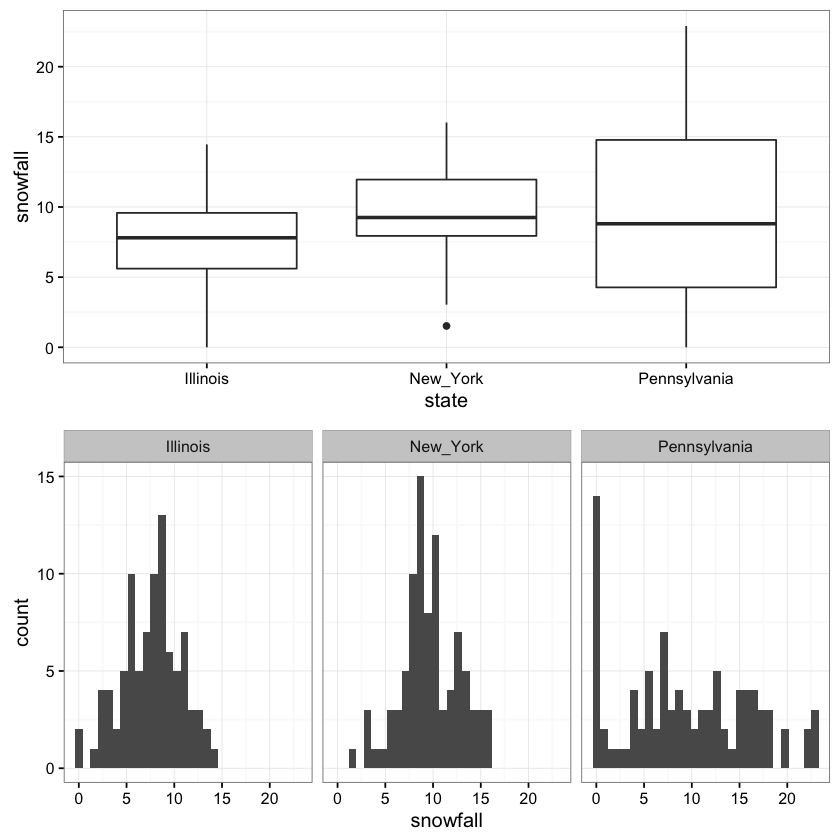

In [31]:

library(reshape2)
library(ggplot2)
hw6_pr_2_data_m <- melt(hw6_pr_2_data, measure.vars = c("Illinois","New_York", "Pennsylvania"))
colnames(hw6_pr_2_data_m)<-c("state", "snowfall")
p1 <- ggplot(hw6_pr_2_data_m, aes(x=state, y=snowfall)) + geom_boxplot() + theme_bw()
p2 <- ggplot(hw6_pr_2_data_m, aes(x=snowfall)) + geom_histogram() + theme_bw() + facet_wrap(~state)

multiplot(p1, p2, cols=1)

In [32]:
## this code just puts the results in a convenient output for laTex, which is the 
## program that outputs the pdf document for this program.
table<- matrix(c(shapiro.test(x =hw6_pr_2_data$Illinois)$statistic,shapiro.test(x =hw6_pr_2_data$Illinois)$p.value,
          shapiro.test(x =hw6_pr_2_data$New_York)$statistic, shapiro.test(x =hw6_pr_2_data$New_York)$p.value,
          shapiro.test(x =hw6_pr_2_data$Pennsylvania)$statistic, shapiro.test(x =hw6_pr_2_data$Pennsylvania)$p.value),
               ncol=2, byrow=TRUE)
row.names(table) <- c("Illinois", "New York", "Pennsylvania")
colnames(table) <- c("Test Statistic", "p value")
table

,Test Statistic,p value
Illinois,0.9897022,0.7091993
New York,0.9816584,0.2351227
Pennsylvania,0.952033403,0.002239245


We fail to reject the null hypothesis of normality for New York and Illinois, but reject the null hypothesis of normality for Pennsylvania

#### b.	(2 points) Conduct Hartley’s Fmax test by hand to test for homogeneity of population variances in snowfall from these three states. Comment on whether or not it is appropriate to conduct this test given the results from a). Assume α = 0.05.

We want to conduct Hartley's Fmax test by hand. This requires taking the ratio of the largest variance to the smallest variance 

$$
F = \frac{S^2_{max}}{S^2_{min}} \sim F_{df_1=n_{max}-1, df_2 =n_{min}-1}
$$

An implementation of the calculations are given below.

In [40]:
## figure out the variances for each column
vars <- apply(X = hw6_pr_2_data, FUN = var, MARGIN = 2) 
## this calculates the variance over the columns
## grab the largest variance and the smallest

s2_max <- max(vars)
s2_min <- min(vars)

## calculate f_max
f_max <- s2_max/s2_min

## now we need to figure out the degrees of freedom
n_max <- nrow(hw6_pr_2_data) ## this grabs the number of rows from
## the column in the data.frame that has the largest variance


In [34]:
n_max

[1] 90

In [35]:
qf_max <- qf(p = 0.95,df1=n_max-1, df2=n_max-1)

In [36]:
qf_max

[1] 1.419888

In [37]:
f_max

[1] 4.770017

As our f_max values is $F_{max} = 4.77 > F_{max, crit}$, we reject the null hypothesis of heterogeneity of variances. However, this test is no appropriate to use as the Pennsylvania data are not normally distributed.

c.	(2 points) Conduct Levine’s test with the Brown-Forsyth modification to test for homogeneity of population variances in snowfall from these three states. As part of this state the null and alternative hypotheses for these tests. SAS code is provided in “Homework_6_SAS_Code.sas”. Assume α = 0.05. When and why might the Brown Forsyth modification be more appropriate than Hartley’s Fmax?


In [38]:
lbf_test <- function(data, group_col, measure_var, alpha=0.05, type="levene"){
    require("plyr")
    ## -------------------------
    ## This function takes a melted data.frame as input
    ## -------------------------
    ## group_col is a string 
    ## of the name of the column 
    ## that corresponds to the grouping 
    ## factor that defines the groupings.
    ## or if it is a number if is 
    ## the number of the column
    ## --------------------------
    gc <- data[,group_col]
    
    N <- nrow(data)
    k <- length(levels(gc))
    ns <- ddply(data,group_col,nrow)
    Z <- numeric(N)
    
    
    means_ddply <- function(df, group_col, measure_var){
        means <- ddply(.data = df, group_col,.fun = function(xx){
            mean=mean(xx[,measure_var], na.rm=TRUE)
        })
        return(means)
    }
    
    medians_ddply <- function(df, group_col, measure_var){
        medians <- ddply(.data = df, group_col,.fun = function(xx){
            median=median(xx[,measure_var], na.rm=TRUE)
        })
        return(medians)
    }
    
    if(type == "levene"){
        means <- means_ddply(df=data, group_col=group_col, measure_var=measure_var)
        for(i in 1:k){
            rws <- gc %in% levels(gc)[i]
            Z[rws] <- abs(data[rws,measure_var] - means[i,2])
            }
        }
    
    if(type =="bf"){
        ## grab the medians
        medians<-medians_ddply(df=data,group_col=group_col,measure_var=measure_var)
        ## loop through and calculate the Z_ij's
        for(i in 1:k){
            rws <- gc %in% levels(gc)[i]
            Z[rws] <- abs(data[rws,measure_var] - medians[i,2])
        }
        
    }
    tmp_df <- data.frame(Z = Z, group_col = gc)
    means_Z<- ddply(tmp_df, .(group_col), summarize, mean(Z))
    z_gm <- mean(tmp_df$Z)
        
    numer <- sum(ns[,2]*(means_Z[,2] - z_gm)^2)

    denom<-0
    for(i in 1:k){
        rws <- gc %in% levels(gc)[i]
        denom <- denom + sum((tmp_df[rws,'Z']-means_Z[i,2])^2)
    }
    norm <- (N-k)/(k-1)
    
    W <- norm*(numer/denom)
    crit <- qf(1-alpha,k-1, N-k)
    pval <- 1-pf(W, k-1, N-k)
    res <- c(W, crit, pval)
    res <- matrix(res, ncol=3, byrow=T)
    colnames(res) <- c("Test Statistic", "Critical Value", "P-val")
    return(res)
}



In [39]:
lbf_test(data = hw6_pr_2_data_m, group_col = 'state', measure_var = 'snowfall', type = 'bf')

Test Statistic,Critical Value,P-val
44.298086,3.029597,0.000000


#### Obviously, we reject $H_0$ and conclude that the variances are not all equal at the $\alpha=0.05$ level.